# Comparison of Models

Imports

In [2]:
import os
import sklearn
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn import tree
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from IPython.display import Image 
import pydotplus
import numpy as np
import pandas as pd

Some functions

In [3]:
# Function to create a tree diagram
def create_tree_graph_png(tree, feature_names):
    tree_str = export_graphviz(tree, feature_names=feature_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png('tree.png')
    return Image(graph.create_png())

def displaying_result(X, y, X_test, y_pred):
    plt.figure()
    plt.scatter(X, y, c="darkorange", label="data")
    plt.plot(X_test, y_pred, color="cornflowerblue", label="max_depth=2", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()

Loading dataset

In [4]:
data_train = pd.read_csv("/Users/cha/Desktop/3A/code/ml-project/data/data_train.csv")
data_val = pd.read_csv("/Users/cha/Desktop/3A/code/ml-project/data/data_val.csv")
data_test = pd.read_csv("/Users/cha/Desktop/3A/code/ml-project/data/data_test.csv")
print(len(data_train), len(data_val), len(data_test))

columns = list(data_train.columns)
columns.remove('Price')
X_train = data_train[columns]
y_train = data_train['Price']
X_val = data_val[columns]
y_val = data_val['Price']
X_test = data_test[columns]
y_test = data_test['Price']

9772 2443 3054


### Decision Tree

In [6]:
pgrid = {
    "max_depth": range(4, 34),
    "min_samples_split": range(100, 1000, 100)
}
grid_search = GridSearchCV(
    tree.DecisionTreeRegressor(),
    param_grid=pgrid,
    scoring='neg_mean_squared_error',
    cv=10
)
grid_search.fit(X_train, y_train)
y_pred = grid_search.best_estimator_.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("max_depth: ", grid_search.best_params_)


MSE:  0.0023672764903680055
max_depth:  {'max_depth': 5, 'min_samples_split': 900}


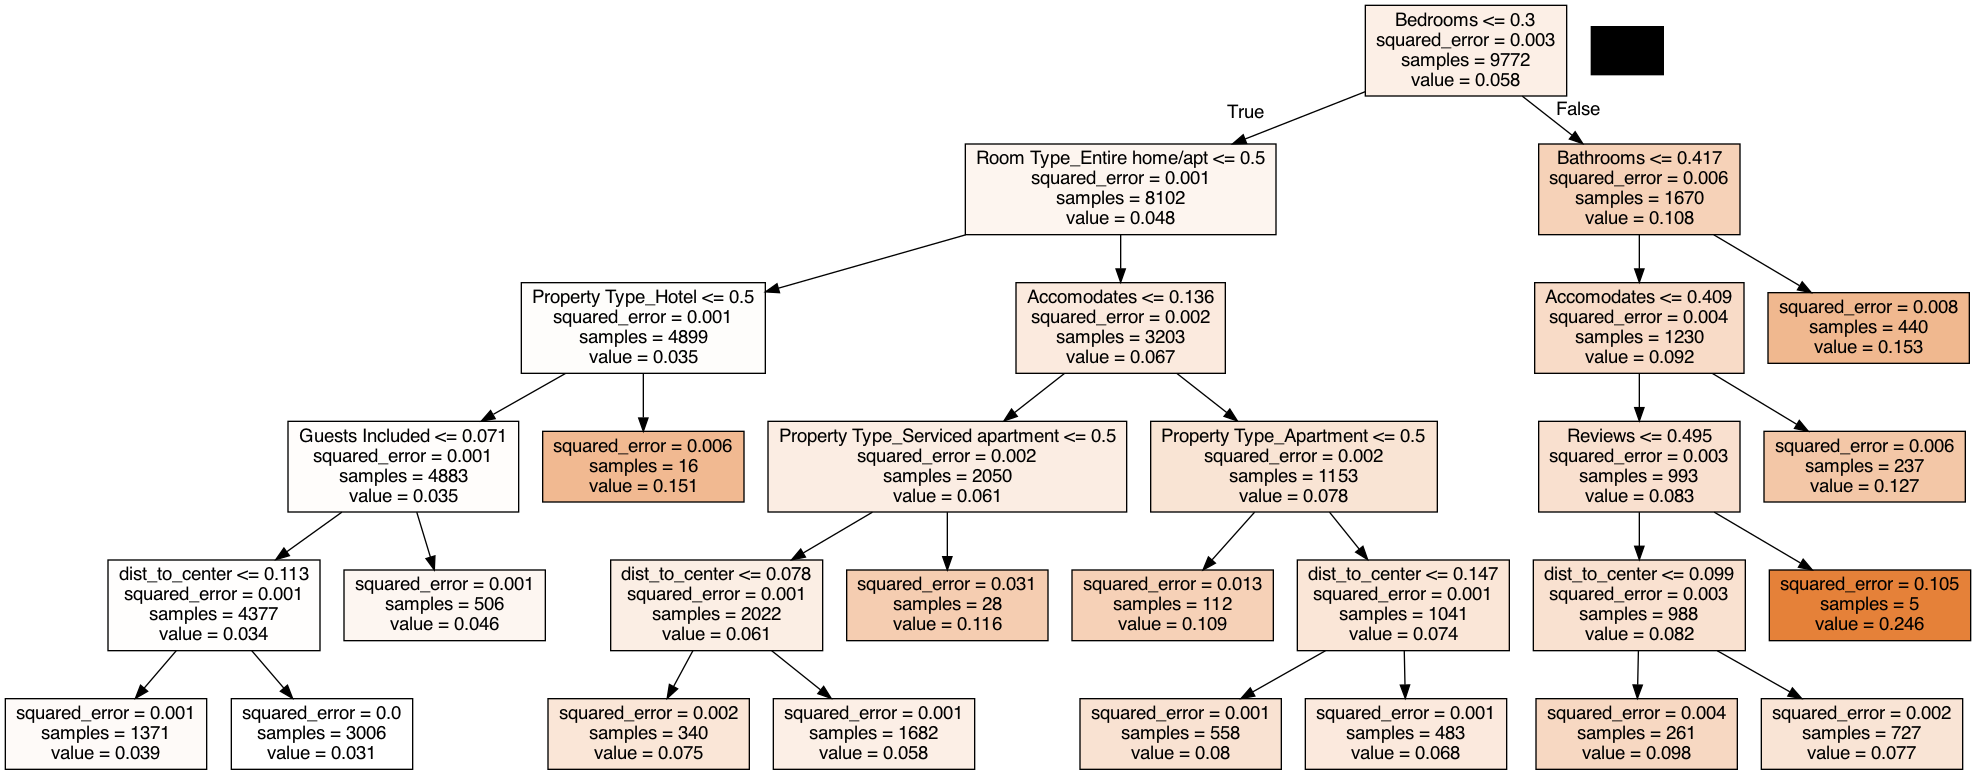

In [7]:
create_tree_graph_png(grid_search.best_estimator_, X_train.columns)

### Random Forests

In [8]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=400)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred))

MSE:  0.0022364273340251305


### Bagging

In [7]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor

pgrid = {
    "max_samples": [0.2, 0.4, 0.6, 0.8],
    "max_features": [0.2, 0.4, 0.6, 0.8]}
grid_search = GridSearchCV(BaggingRegressor(tree.DecisionTreeRegressor()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
y_pred=grid_search.best_estimator_.predict(X_test)
best_max_samples=grid_search.best_estimator_.max_samples
best_max_features=grid_search.best_estimator_.max_features
print("MSE: ", mean_squared_error(y_test, y_pred))
print("best_max_samples ", best_max_samples)
print("best_max_features ", best_max_features)

MSE:  0.0024200667206962455
best_max_samples  0.2
best_max_features  0.8


### Gradient Boosting

In [6]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_booster = GradientBoostingRegressor(learning_rate=0.1)
gradient_booster.fit(X_train,y_train)
y_pred = gradient_booster.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred))

MSE:  0.002219153173731952
